Connected to Data370_25au_p312 (Python 3.12.11)

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
online_news_popularity = fetch_ucirepo(id=332) 
  
# data (as pandas dataframes) 
X = online_news_popularity.data.features 
y = online_news_popularity.data.targets 
  
# metadata 
print(online_news_popularity.metadata) 
  
# variable information 
print(online_news_popularity.variables) 

{'uci_id': 332, 'name': 'Online News Popularity', 'repository_url': 'https://archive.ics.uci.edu/dataset/332/online+news+popularity', 'data_url': 'https://archive.ics.uci.edu/static/public/332/data.csv', 'abstract': 'This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 39797, 'num_features': 58, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': [' shares'], 'index_col': ['url'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Thu Feb 15 2024', 'dataset_doi': '10.24432/C5NS3V', 'creators': ['Kelwin Fernandes', 'Pedro Vinagre', 'Paulo Cortez', 'Pedro Sernadela'], 'intro_paper': {'ID': 390, 'type': 'NATIVE', 'title': 'A Proactive Intelligent Decisio

In [ ]:
import pandas as pd

# 1. Check Row Requirement (Rows: >= 10,000)
num_rows = X.shape[0]
meets_row_req = num_rows >= 10000
print(f"Rows: {num_rows} (Requirement >= 10,000: {meets_row_req})")
 
# 2. Check Feature Requirement (Features: >= 50)
num_features = X.shape[1]
meets_feature_req = num_features >= 50
print(f"Features: {num_features} (Requirement >= 50: {meets_feature_req})")

# 3. Check for Missing Values (for 'data handled properly') 
missing_values = X.isnull().sum().sum()
print(f"Total Missing Values in X: {missing_values}")
 
# 4. Check for Categorical Data (for 'categorical encoding') 
# We check the 'dtype' of each column in the feature dataframe X
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) == 0:
    print("Categorical Columns to Encode: 0")
    print("Note: No categorical encoding is needed for the 'X' features.")
else:
    print(f"Categorical Columns to Encode: {len(categorical_cols)}")
    print(f"Columns: {list(categorical_cols)}")

Rows: 39644 (Requirement >= 10,000: True)
Features: 58 (Requirement >= 50: True)
Total Missing Values in X: 0
Categorical Columns to Encode: 0
Note: No categorical encoding is needed for the 'X' features.


In [ ]:
# This will show us the *actual* column name in the y DataFrame
print("Column(s) in the 'y' target DataFrame:")
print(y.columns)

Column(s) in the 'y' target DataFrame:
Index([' shares'], dtype='object')


count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64


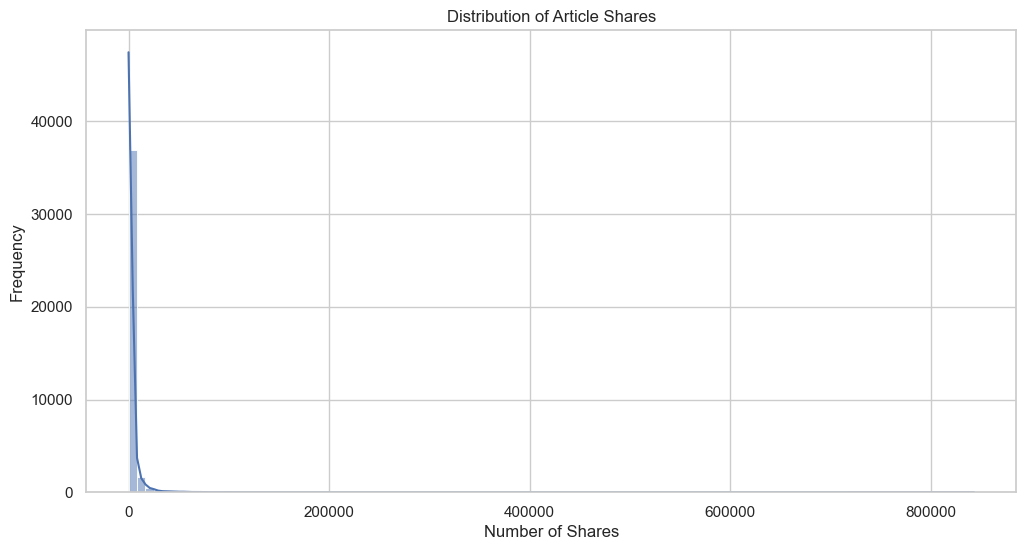

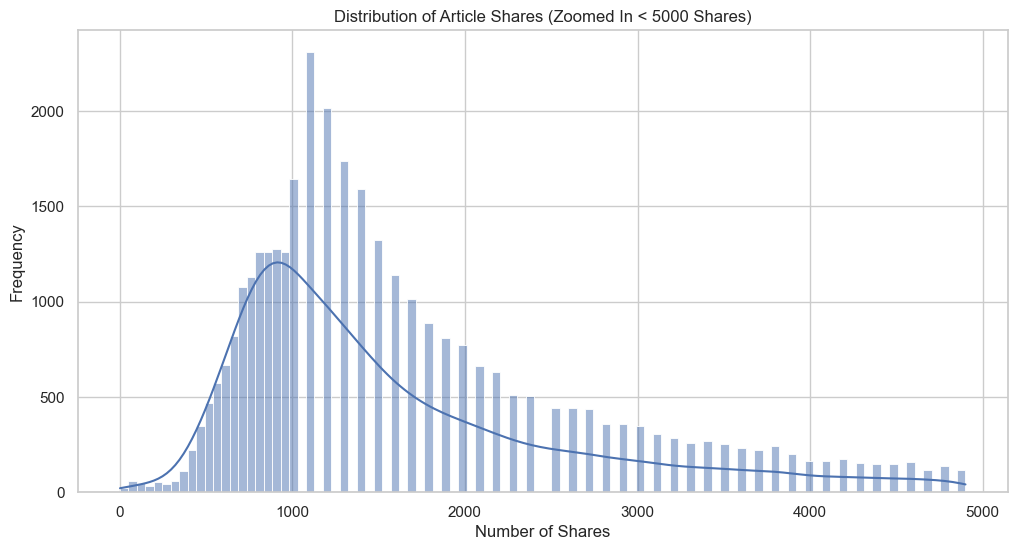

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# FIX: Strip whitespace from column names
# This removes leading/trailing spaces, e.g., ' shares' becomes 'shares'
X.columns = X.columns.str.strip()
y.columns = y.columns.str.strip()

# Combine X and y for easier EDA
df = pd.concat([X, y], axis=1)
# Analyse target variable distribution
# Set up a plotting style
sns.set(style="whitegrid")

# 1. Get descriptive statistics for 'shares'
print(df['shares'].describe())

# 2. Plot a histogram to see the distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['shares'], bins=100, kde=True)
plt.title('Distribution of Article Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.show()

# 3. Check the distribution again, but with a limit
plt.figure(figsize=(12, 6))
sns.histplot(df[df['shares'] < 5000]['shares'], bins=100, kde=True)
plt.title('Distribution of Article Shares (Zoomed In < 5000 Shares)')
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.show()

 From the first plot (Distribution of Article Shares),
 we know that almost all your data is clustered on the far left.
 Thus, the prediction model will meet a problem:
 If I feed this to a standard linear regression,
 the model will be obsessed with trying to correctly predict those few "viral" articles (the 800,000+ ones)
 and will do a very poor job of predicting the "normal" articles (the 1,000-3,000 share ones), which are the vast majority.
 The second plot ("Zoomed In") shows the distribution of the "normal" articles is still right-skewed.
 To silve all of this, we must log-transform the target variable.
 This will compress the huge values and spread out the low values, resulting in a much more "normal" (bell-shaped) distribution that models can learn from.


--- Descriptive Statistics for 'log_shares' ---
count    39644.000000
mean         7.475692
std          0.929674
min          0.693147
25%          6.853299
50%          7.244942
75%          7.937732
max         13.645079
Name: log_shares, dtype: float64


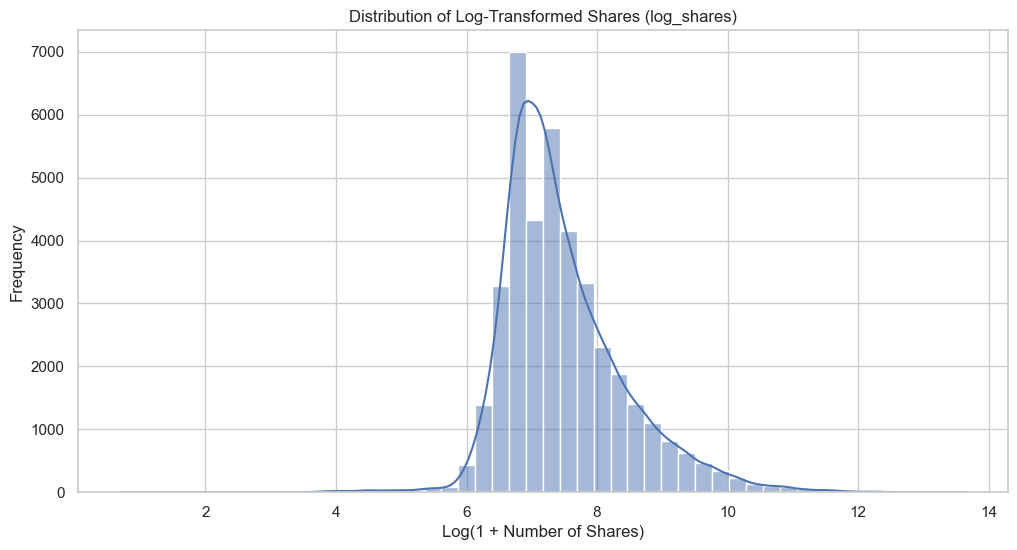

In [ ]:
df['log_shares'] = np.log1p(df['shares'])

# --- Plot the new distribution ---
print("\n--- Descriptive Statistics for 'log_shares' ---")
print(df['log_shares'].describe())

plt.figure(figsize=(12, 6))
sns.histplot(df['log_shares'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Shares (log_shares)')
plt.xlabel('Log(1 + Number of Shares)')
plt.ylabel('Frequency')
plt.show()

       n_tokens_content  title_subjectivity  global_sentiment_polarity
count      39644.000000        39644.000000               39644.000000
mean         546.514731            0.282353                   0.119309
std          471.107508            0.324247                   0.096931
min            0.000000            0.000000                  -0.393750
25%          246.000000            0.000000                   0.057757
50%          409.000000            0.150000                   0.119117
75%          716.000000            0.500000                   0.177832
max         8474.000000            1.000000                   0.727841


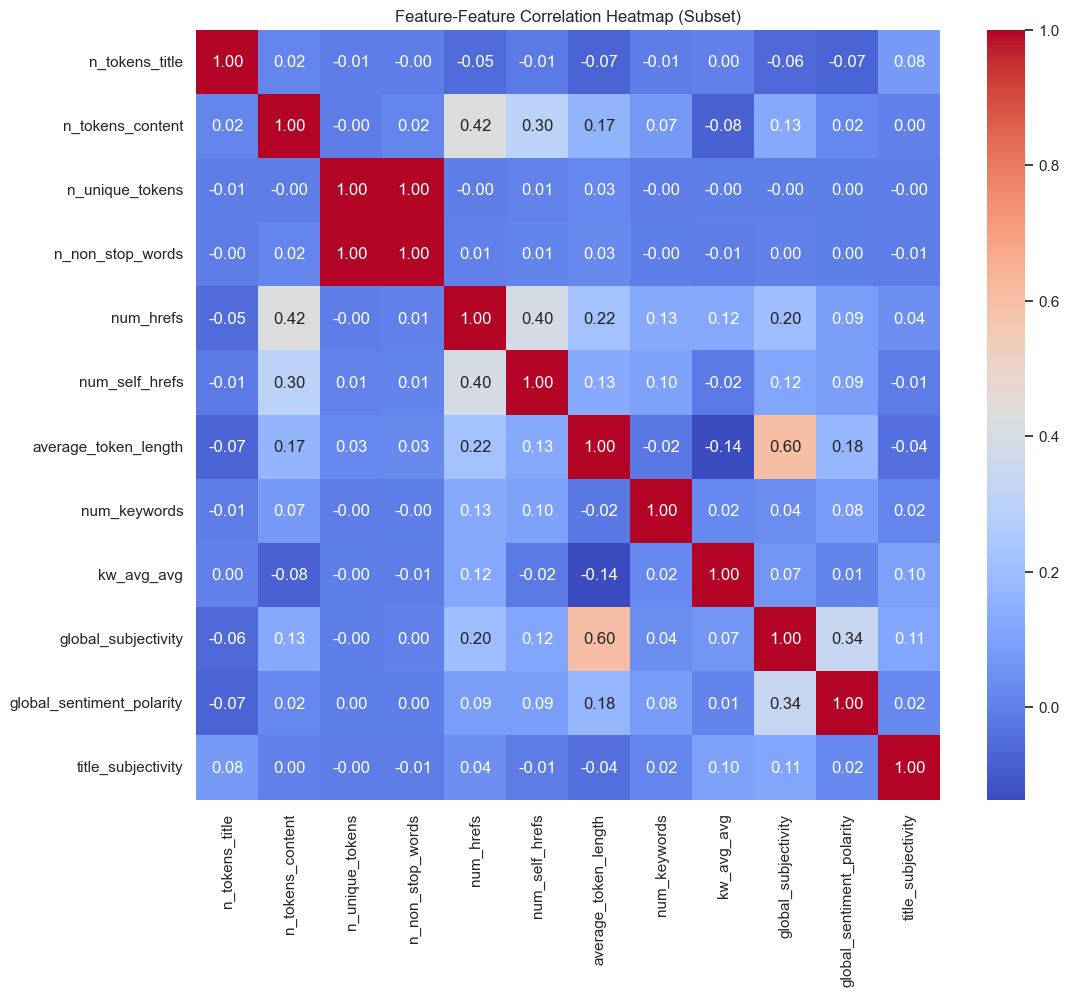

In [ ]:
# 1. Check feature scales
# .describe() on all features will be too much. Let's look at a sample.
print(df[['n_tokens_content', 'title_subjectivity', 'global_sentiment_polarity']].describe())

# 2. Check for multicollinearity (features correlated with each other)
# This is computationally intensive. Let's just check a subset of 10-15 features.
feature_subset = [
    'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 
    'n_non_stop_words', 'num_hrefs', 'num_self_hrefs', 
    'average_token_length', 'num_keywords', 'kw_avg_avg',
    'global_subjectivity', 'global_sentiment_polarity', 'title_subjectivity'
]

# Calculate the correlation matrix for the subset
corr_matrix = df[feature_subset].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature-Feature Correlation Heatmap (Subset)')
plt.show()

 n_tokens_content has a max of 8474, while title_subjectivity has a max of 1.0. Because of this massive difference in scales,
 you must use a scaler (like StandardScaler from scikit-learn) before training any linear models.
 From the correlation heatmap, we can see that some features are highly correlated.
 The correlation between n_non_stop_words and n_unique_tokens is 1.00.
 This means they provide redundant information. Keeping both will confuse your linear models.

In [ ]:
# Which features are most strongly correlated with log_shares?
# Calculate the correlation of all features with our *new* target, 'log_shares'
correlations = df.corr(numeric_only=True)['log_shares'].sort_values()

# Display the top 10 most positively correlated features
print("--- Top 10 Positive Correlations ---")
print(correlations.tail(11)[:-1]) # tail(11) to include the top 10, then [:-1] to exclude 'shares' itself

print("\n--- Top 10 Negative Correlations ---")
# Display the top 10 most negatively correlated features
print(correlations.head(10))

--- Top 10 Positive Correlations ---
data_channel_is_socmed        0.081144
self_reference_avg_sharess    0.087238
num_imgs                      0.091519
num_hrefs                     0.105142
kw_min_avg                    0.108850
kw_max_avg                    0.109343
is_weekend                    0.114391
LDA_03                        0.126037
kw_avg_avg                    0.221822
shares                        0.510181
Name: log_shares, dtype: float64

--- Top 10 Negative Correlations ---
LDA_02                          -0.165076
data_channel_is_world           -0.151685
data_channel_is_entertainment   -0.082531
LDA_01                          -0.052992
rate_negative_words             -0.048176
average_token_length            -0.045321
weekday_is_wednesday            -0.036609
avg_negative_polarity           -0.034323
weekday_is_tuesday              -0.031095
data_channel_is_bus             -0.030587
Name: log_shares, dtype: float64


 The analysis of feature-target relationships reveals that an article's topic and keyword popularity are the most significant drivers of its shares.
 The strongest positive predictor is kw_avg_avg (0.22 correlation), suggesting that articles about already-popular topics are shared more.
 Publishing on the weekend (is_weekend, 0.11) and belonging to a specific topic (LDA_03, 0.13) are also associated with higher engagement.
 Conversely, the strongest negative predictors are related to content category, with articles from "Topic 2" (LDA_02, -0.17) and the "World News" channel (data_channel_is_world, -0.15) seeing significantly fewer shares.
 These findings indicate that what an article is about and when it is published are key factors in predicting its popularity.

In [ ]:
# Our Metrics: We will use Accuracy, Precision, and Recall
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score 

# Create the Binary Classification Target 
# Set the threshold to 1400, as used in the reference paper
threshold_shares = 1400

print(f"Using a fixed threshold of {threshold_shares} shares.")

# Create the new target column 'is_popular'
# if shares > threshold, 0 otherwise
df['is_popular'] = (df['shares'] > threshold_shares).astype(int)

# Check the balance of our new target
print("\nNew Target Variable 'is_popular':")
print(df['is_popular'].value_counts())

Using a fixed threshold of 1400 shares.

New Target Variable 'is_popular':
is_popular
0    20082
1    19562
Name: count, dtype: int64


In [ ]:
# 1. Data: Define X (features) and y (target)
# X: Drop the redundant feature and all target-related columns
X = df.drop(columns=['shares', 'log_shares', 'n_non_stop_words', 'is_popular']) 
# y: Our new binary target
y = df['is_popular']

# 2. Split Data into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (31715, 57)
Testing set shape: (7929, 57)


In [ ]:
# Define the Preprocessing Step
scaler = StandardScaler()

# Define the Models to Compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42),
    "Support Vector Machine (SVM)": SVC() 
}

In [ ]:
import time 
from sklearn.metrics import classification_report, accuracy_score

print("\n--- Starting Model Training ---")

results_reports = {} 
model_metrics_list = [] 

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    start_time = time.time()
    
    # Create the full pipeline
    pipeline = Pipeline(steps=[('scaler', scaler),
                              ('model', model)])
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    end_time = time.time()
    time_taken = end_time - start_time
    
    # 1. Get the string report (for printing later)
    report_string = classification_report(y_test, y_pred)
    results_reports[name] = report_string
    
    # 2. Get the dictionary report (for the table)
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    
    # 3. Extract the metrics we want (using 'weighted avg' for a balanced view)
    accuracy = report_dict['accuracy']
    precision = report_dict['weighted avg']['precision']
    recall = report_dict['weighted avg']['recall']
    f1_score = report_dict['weighted avg']['f1-score']
    
    # 4. Append the metrics to our list
    model_metrics_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1_score,
        'Time (s)': time_taken
    })
    
    # This print statement is still useful
    print(f"Done. Accuracy: {accuracy:.4f}")
    print(f"Training & Prediction took: {time_taken:.2f} seconds")

print("\n--- Model Training Complete ---")


for name, report in results_reports.items():
    print(f"\n--- Classification Report for {name} ---")
    print(report)

# Create Final Comparison Table with All Metrics
results_df = pd.DataFrame(model_metrics_list)
results_df = results_df.set_index('Model').sort_values(by="Accuracy", ascending=False)

print("\n--- Final Model Comparison (All Metrics) ---")
# Set display format for floats
pd.set_option('display.float_format', lambda x: f'{x:.4f}')
print(results_df)


--- Starting Model Training ---

--- Training Logistic Regression ---
Done. Accuracy: 0.6515
Training & Prediction took: 0.13 seconds

--- Training K-Nearest Neighbors (KNN) ---
Done. Accuracy: 0.6071
Training & Prediction took: 0.23 seconds

--- Training Random Forest ---
Done. Accuracy: 0.6621
Training & Prediction took: 1.89 seconds

--- Training Support Vector Machine (SVM) ---
Done. Accuracy: 0.6542
Training & Prediction took: 35.95 seconds

--- Model Training Complete ---

--- Classification Report for Logistic Regression ---
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      4075
           1       0.65      0.62      0.63      3854

    accuracy                           0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929


--- Classification Report for K-Nearest Neighbors (KNN) ---
              precision    recall  f1-score   support

           0      

--- Fitting Random Forest to get feature importances ---

--- Top 15 Most Important Features (from Random Forest) ---
                       Feature  Importance
24                  kw_avg_avg      0.0444
23                  kw_max_avg      0.0365
38                      LDA_02      0.0321
25   self_reference_min_shares      0.0314
37                      LDA_01      0.0306
21                  kw_avg_max      0.0298
18                  kw_avg_min      0.0295
40                      LDA_04      0.0294
27  self_reference_avg_sharess      0.0292
36                      LDA_00      0.0288
41         global_subjectivity      0.0275
2              n_unique_tokens      0.0275
3     n_non_stop_unique_tokens      0.0272
8         average_token_length      0.0271
39                      LDA_03      0.0267


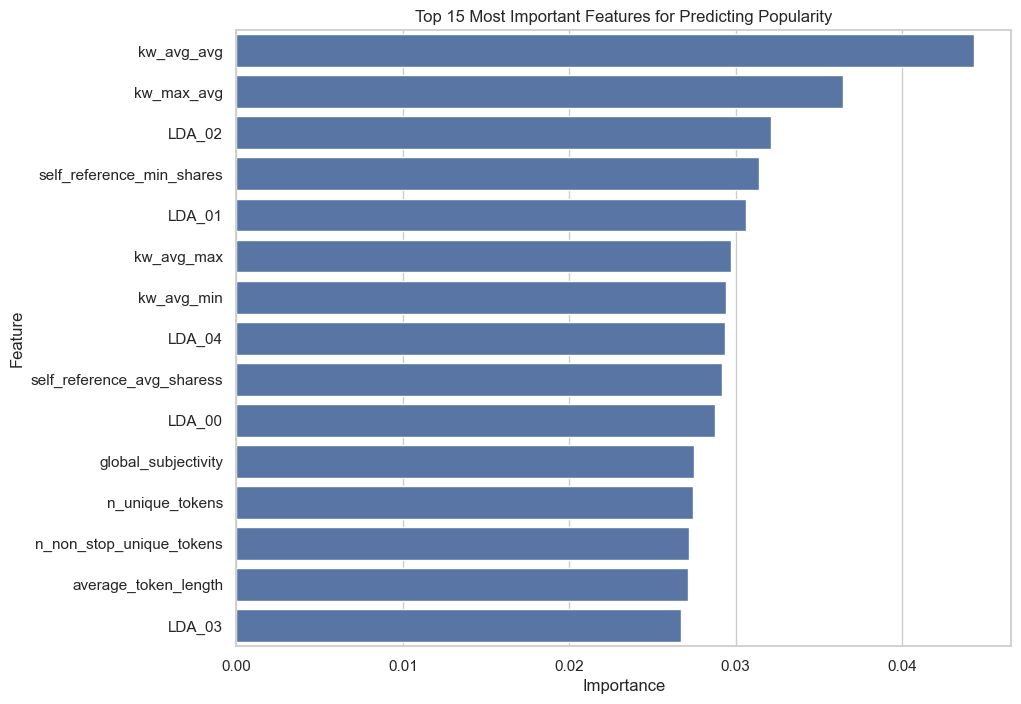

In [ ]:
# From above, we get the best model is Random Forest.
# 1. Define the RF model again
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)

# 2. Create the pipeline
rf_pipeline = Pipeline(steps=[('scaler', scaler),
                             ('model', rf_model)])

# 3. Fit it on the *full* training set
print("--- Fitting Random Forest to get feature importances ---")
rf_pipeline.fit(X_train, y_train)

# 4. Get the feature importances from the 'model' step
importances = rf_pipeline.named_steps['model'].feature_importances_

# 5. Get the feature names
# We use the column names from X_train
feature_names = X_train.columns

# 6. Create a DataFrame for easy viewing
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# --- Display the results ---
print("\n--- Top 15 Most Important Features (from Random Forest) ---")
print(importance_df.head(15))

# --- Plot the results ---
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Most Important Features for Predicting Popularity')
plt.savefig('feature_importance.png')
plt.show()